# Avacado Project

Avocado is a fruit consumed by people heavily in the United States. 

# Content:
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# Importing the required Libraries 

In [2]:
df=pd.read_csv("avocado.csv")
df                                     #loading dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA (Exploratory Data Analysis):

In [3]:
df.shape                      # Displaying the Total number of rows & columns

(18249, 14)

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df.columns                    # Displaying all the columns in the dataset

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# About Columns:
1.Unnamed: 0 It is the serial number of each row.

2.Date: the date of observation.

3.AveragePrice: average price of avacados.

4.Total Volume: quantity of avacados.

5.4046: total number of avacados with PLU 4046 sold.

6.4225: total number of avacados with PLU 4225 sold.

7.4770: total number of avacados with PLU 4770 sold.

8.Total Bags: total number of bags sold.

9.Small Bags: number of small bags.

10.Large Bags: number of large bags.

11.XLarge Bags: number of extra large bags.

12.Type: type of avacados.

13.Year: the year in which the observation is taken.

14.Region: the city or region of observation.

In [7]:
df=pd.DataFrame(data=df)
df                                  #giving the structural format to dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df.info()        #displaying the total missing values and data type of every column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.isnull().sum()              # There are no missing values present in this Dataset

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

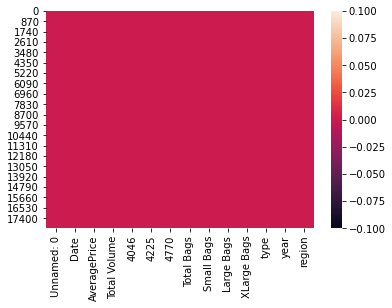

In [10]:
sns.heatmap(df.isnull())               # There are no missing values present in this Dataset

In [11]:
df['type'].value_counts()                  # As we can see that Conventional & Organic Avocados are equal in quantities

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

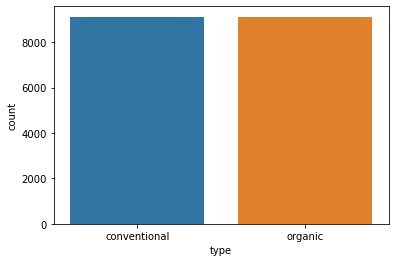

In [12]:
sns.countplot(df['type'])                  #graphical representation of number of each type of avocado

<AxesSubplot:xlabel='type', ylabel='count'>

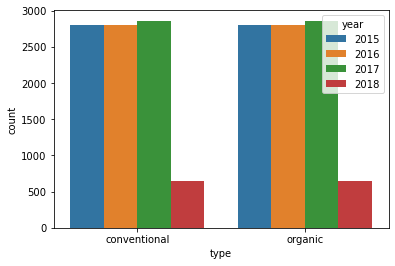

In [13]:
#we are checking sales of conventional and organic avocados each year

sns.countplot(x=df['type'],hue=df['year'])

We can see that sales of both types of avocados was dropped suudenly in year 2018

In [14]:
df['region'].value_counts()

Boise                  338
TotalUS                338
HarrisburgScranton     338
Atlanta                338
Charlotte              338
Denver                 338
RaleighGreensboro      338
Portland               338
Sacramento             338
West                   338
Houston                338
California             338
Detroit                338
Columbus               338
Southeast              338
CincinnatiDayton       338
RichmondNorfolk        338
HartfordSpringfield    338
Chicago                338
Louisville             338
Orlando                338
Plains                 338
NorthernNewEngland     338
MiamiFtLauderdale      338
Roanoke                338
Seattle                338
Albany                 338
NewYork                338
LosAngeles             338
Northeast              338
GrandRapids            338
Midsouth               338
NewOrleansMobile       338
Philadelphia           338
GreatLakes             338
DallasFtWorth          338
Jacksonville           338
P

<AxesSubplot:xlabel='region', ylabel='count'>

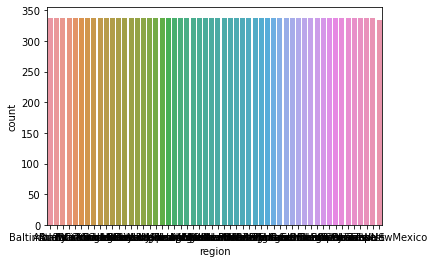

In [15]:
sns.countplot(df['region'])

In [16]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df                                              

#Here Unnamed: 0 is the serial number column, which we can drop, as it is not affecting our dataset.

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Checking Correlation:

In [17]:
df_corr=df.corr()
df_corr              # Displaying the Correlation of all the independent variables with the Target Variable

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

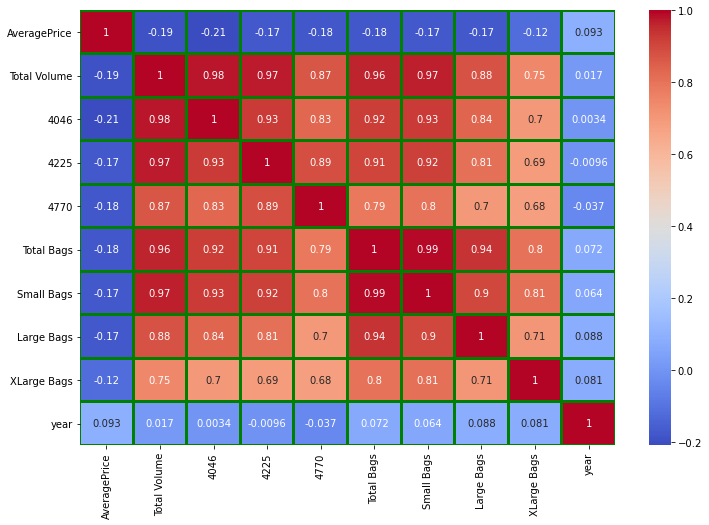

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,linewidths=2, cmap='coolwarm',linecolor='green')

# Outcome of correlation

Only year is positively correlated with target column with 9 percent. Else are negatively correlated which shows data is highly skewed.

Max correlation: year

Min correlation: 4046

# Describing dataset 

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Describing dataset with heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

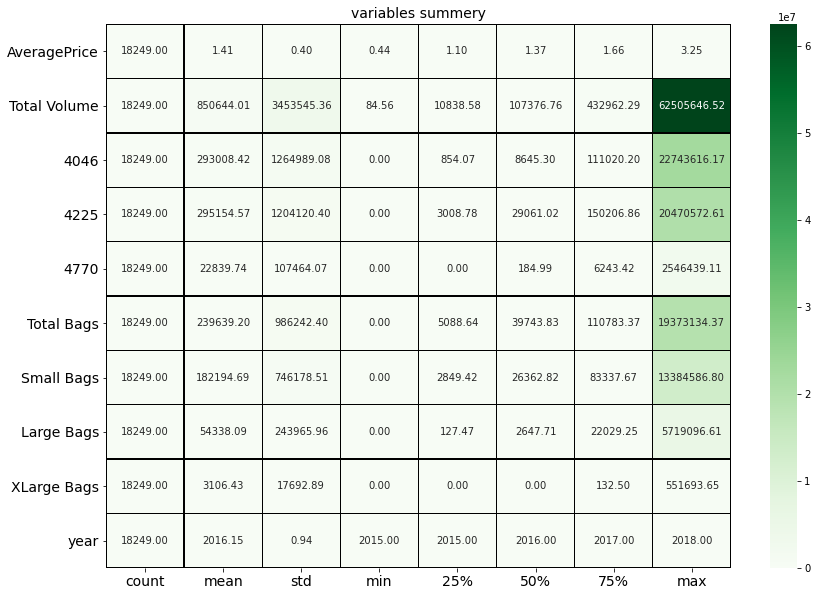

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().transpose(), annot=True,linecolor='black',linewidth=0.2,fmt='.2f',cmap='Greens')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("variables summery",fontsize=14)
plt.show

# Outcome of describe of datasets:
From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help in data cleaning.

Total number of rows and columns in dataset:

1.18249 rows

2.12 columns

Total volume:

    1.Mean=850644.01

    2.std=3453545.36

    3.max_value=62505646.52

    4.min_value=84.56

4046:

    1.Mean=293008.42

    2.std=1264989.08

    3.max_value=22743616.17

    4.min_value=0.00

4225:

    1.Mean=295154.57

    2.std=1204120.40

    3.max_value=20470572.61

    4.min_value=0.00

4770:

    1.Mean=22839.74

    2.std=107464.07

    3.max_value=2546439.11

    4.min_value=0.00

Total Bags:

    1.Mean=239639.20

    2.std=986242.40

    3.max_value=19373134.37

    4.min_value=0.00

Small Bags:

    1.Mean=182194.69

    2.std=746178.51

    3.max_value=13384586.80

    4.min_value=0.00

Large Bags:

    1.Mean=54338.09

    2.std=243965.96

    3.max_value=5719096.61

    4.min_value=0.00

XLarge Bags:

    1.Mean=3106.43

    2.std=17692.89

    3.max_value=551693.65

    4.min_value=0.00

year:

    1.Mean=2016.15

    2.std=0.94

    3.max_value=2018.00

    4.min_value=2015.00

AveragePrice:

    1.Mean=1.41

    2.std=0.40

    3.max_value=3.25

    4.min_value=0.44

AveragePrice and region are our target column.

# Outlier Detection:

In [21]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:>

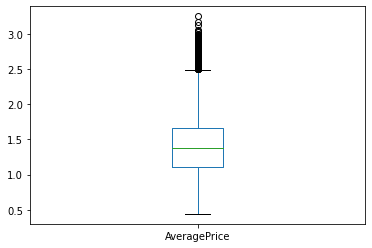

In [22]:
df['AveragePrice'].plot.box()                    #we can see that there are many outtliers present in avarage price column

<AxesSubplot:>

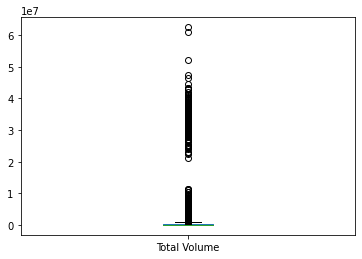

In [23]:
df['Total Volume'].plot.box()            #we can see that there are many outtliers present in Total volume column

<AxesSubplot:>

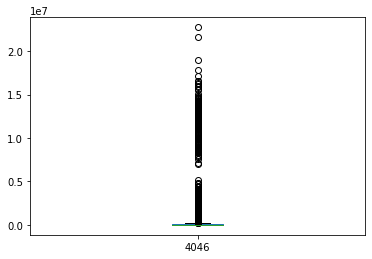

In [24]:
df['4046'].plot.box()                 #we can see that there are many outtliers present in 4046 column

<AxesSubplot:>

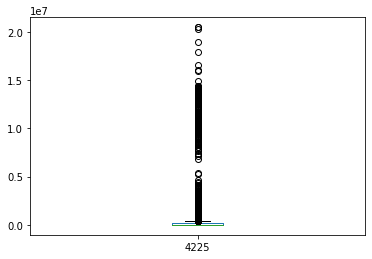

In [25]:
df['4225'].plot.box()                       #we can see that there are many outtliers present in 4225 column

<AxesSubplot:>

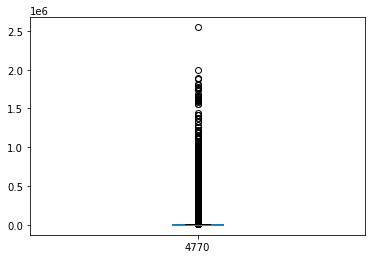

In [26]:
df['4770'].plot.box()              #we can see that there are many outtliers present in 4770 column

<AxesSubplot:>

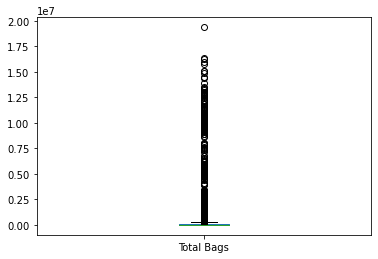

In [27]:
df['Total Bags'].plot.box()                    #we can see that there are many outtliers present in total bags column

<AxesSubplot:>

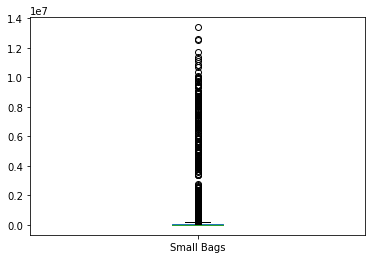

In [28]:
df['Small Bags'].plot.box()                         #we can see that there are many outtliers present in small bags column

<AxesSubplot:>

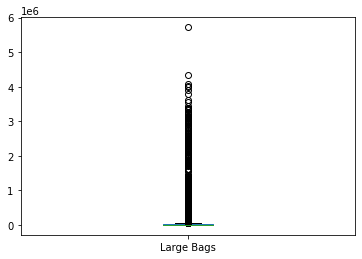

In [29]:
df['Large Bags'].plot.box()                      #we can see that there are many outtliers present in large bags column

<AxesSubplot:>

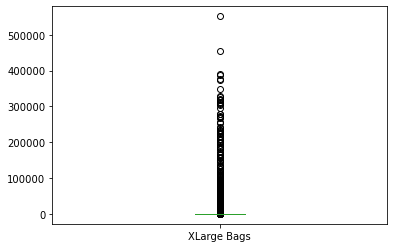

In [30]:
df['XLarge Bags'].plot.box()                     #we can see that there are many outtliers present in Xlarge bags column

<AxesSubplot:>

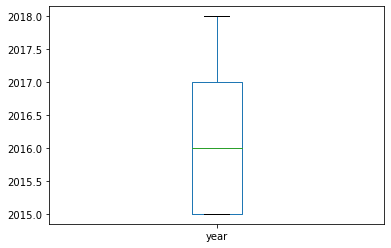

In [31]:
df['year'].plot.box()                             #there are no outliers in year column

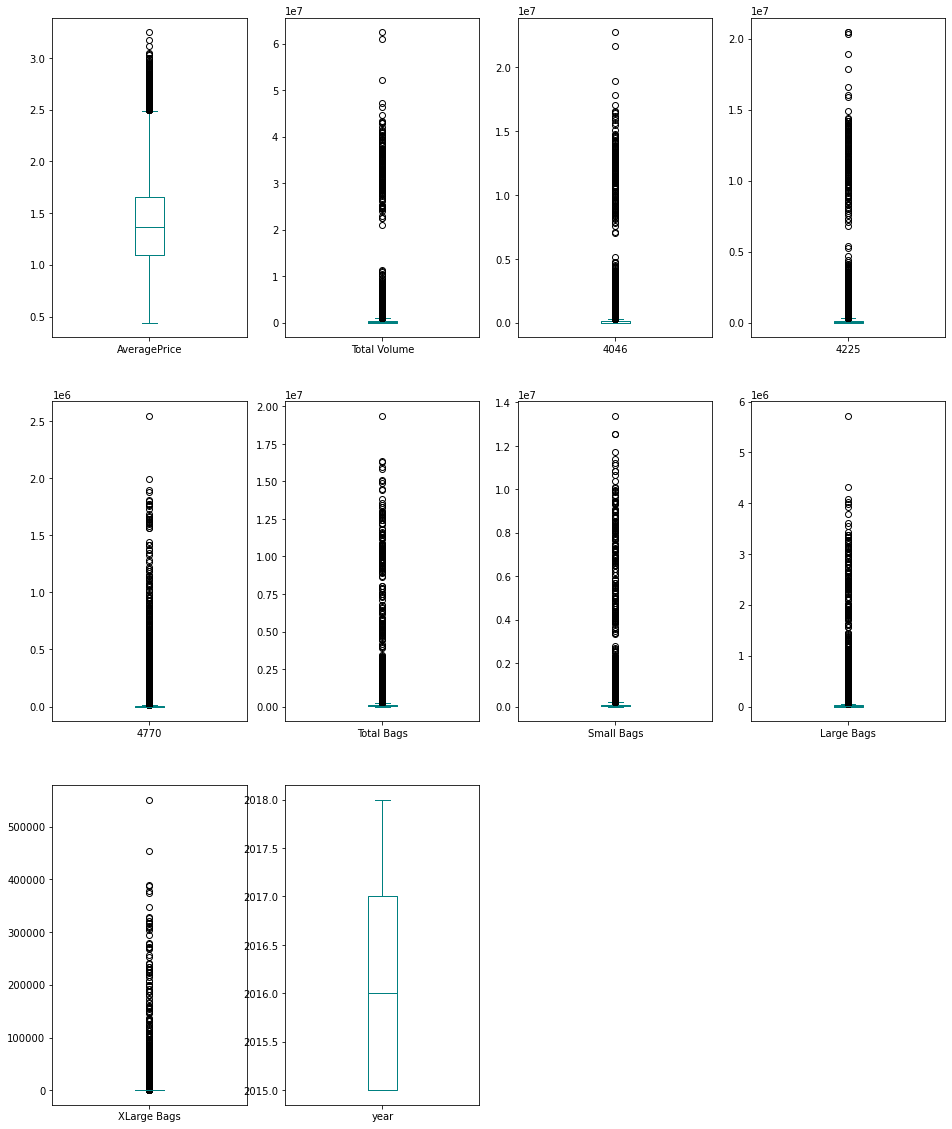

In [32]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(16,20),color='Teal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

In [33]:
#From above we can see that columns 'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags',
#'XLarge Bags' has more outliers, while columns 'year' have no outliers. Column 'AveragePrice' has 
#outliers 'Average price' and 'region' are target column.

# Checking Skewness:

In [34]:
df.skew() 

# We can see that most of the columns have a very high level of skewness

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

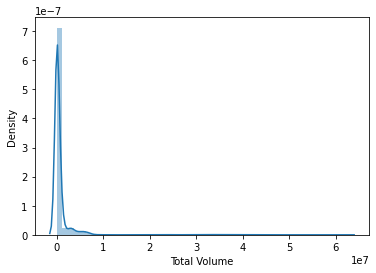

In [35]:
sns.distplot(df["Total Volume"])

# The Total Volume column is displaying very high Skewness Level

<AxesSubplot:xlabel='4046', ylabel='Density'>

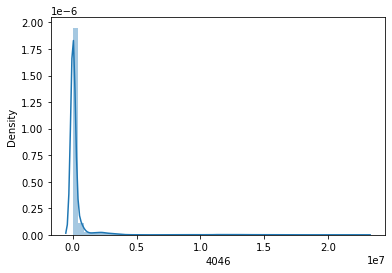

In [36]:
sns.distplot(df["4046"])

# The 4046 column is displaying very high Skewness Level

<AxesSubplot:xlabel='4225', ylabel='Density'>

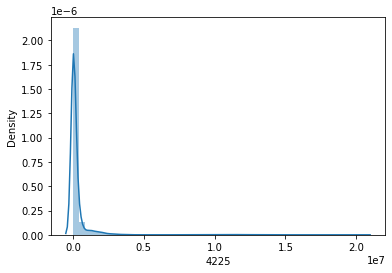

In [37]:
sns.distplot(df["4225"])

# The 4225 column is displaying very high Skewness Level

<AxesSubplot:xlabel='4770', ylabel='Density'>

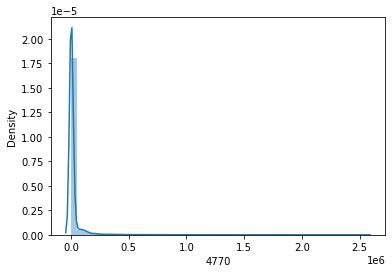

In [38]:
sns.distplot(df["4770"])

# The 4770 column is displaying very high Skewness Level

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

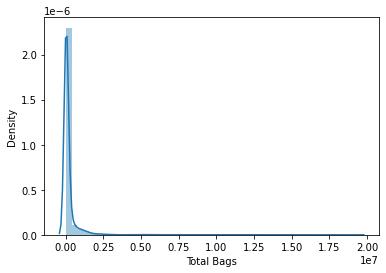

In [39]:
sns.distplot(df["Total Bags"])

# The Total Bags column is displaying very high Skewness Level

# Dropping unnecessary columns as well as columns with multicolinearity

In [40]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [41]:
df.drop(columns=["Small Bags","Large Bags","XLarge Bags"], inplace=True)

# We are dropping these columns to avoid multicolinearity 

In [42]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico


In [43]:
df['Day'] = pd.DatetimeIndex(df['Date']).year                # Extracting Day from the Date column
df['Month'] = pd.DatetimeIndex(df['Date']).month            # Extracting Month from the Date column
df["Year"]=pd.DatetimeIndex(df['Date']).year               # Extracting Year from the Date column

In [44]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,2015,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,2015,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,2015,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,2015,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico,2018,2,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico,2018,1,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico,2018,1,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico,2018,1,2018


In [45]:
df.drop(columns=["Date","year"],inplace=True)

# Dropping Date & Year to avoid multicollinearity as we have created Day, Month & Year column out of it

In [46]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany,2015,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany,2015,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany,2015,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,WestTexNewMexico,2018,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,WestTexNewMexico,2018,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,WestTexNewMexico,2018,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,WestTexNewMexico,2018,1,2018


# Label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in training data

In [49]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,1,2018


# Outlier removal:

In [50]:
from scipy.stats import zscore 

In [51]:
z=np.abs(zscore(df))
z
#We are taking the absolute of the zscore so all the values will be displayed in positive standard Deviation

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.22128204, 1.64763162,
        1.22128204],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.22128204, 1.64763162,
        1.22128204],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.22128204, 1.64763162,
        1.22128204],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.97050371, 1.46495942,
        1.97050371],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.97050371, 1.46495942,
        1.97050371],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.97050371, 1.46495942,
        1.97050371]])

In [52]:
print(np.where(z>3))

# Printing the integer location of all the values that have Standard Deviation greater than +3
# These points determine the point of outliers

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [53]:
df_new=df[(z<3).all(axis=1)] 
df_new

# Taking all the values within +3 Standard Deviation and saving it in another DataFrame "df_new"
# This new Dataset formed is without the outliers

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,1,2018


In [54]:
df.shape

(18249, 11)

In [55]:
df_new.shape

(17823, 11)

In [56]:
data_loss=((18249-17823)/18249)*100
data_loss

# The Data Loss is 2.33% which is less than 5%, Therefore we will drop the outliers

2.3343744862732203

# Dividing data in features and vectors:

Taking AveragePrice as target column and using Regression.

In [57]:
x_a=df_new.drop(columns=['AveragePrice'])
y_a=df_new['AveragePrice']                         #for regression model

x_b=df_new.drop(columns=['region'])
y_b=df_new['region']                               #for classification model
                                                

In [58]:
x_a

,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,12,2015
1,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,12,2015
2,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,12,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,12,2015
4,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,1,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,1,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,1,2018


In [59]:
y_a

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17823, dtype: float64

In [60]:
x_b

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,2018,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,2018,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,2018,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,2018,1,2018


In [61]:
y_b

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17823, dtype: int32

In [62]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,11,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,1,2018


# Skewness Treatment

In [63]:
from sklearn.preprocessing import power_transform
x_a=power_transform(x_a,method='yeo-johnson')
x_a

# Applying Power Transform function and the skewness treated data has been saved under x_a variable

array([[-0.08824312, -0.66461272,  0.33149987, ...,  0.        ,
         1.49304711,  0.        ],
       [-0.15946921, -0.78340444,  0.25079502, ...,  0.        ,
         1.49304711,  0.        ],
       [ 0.18844774, -0.73835368,  0.62469139, ...,  0.        ,
         1.49304711,  0.        ],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.        ,
        -1.64084043,  0.        ]])

In [64]:
x_b=power_transform(x_b,method='yeo-johnson')
x_b

# Applying Power Transform function and the skewness treated data has been saved under x_b variable

array([[-0.1073937 , -0.08824312, -0.66461272, ...,  0.        ,
         1.49304711,  0.        ],
       [-0.05393955, -0.15946921, -0.78340444, ...,  0.        ,
         1.49304711,  0.        ],
       [-1.28995034,  0.18844774, -0.73835368, ...,  0.        ,
         1.49304711,  0.        ],
       ...,
       [ 1.19108372, -0.78125419, -0.62550412, ...,  0.        ,
        -1.64084043,  0.        ],
       [ 1.31938795, -0.70826868, -0.55520364, ...,  0.        ,
        -1.64084043,  0.        ],
       [ 0.62467099, -0.67410164, -0.36979653, ...,  0.        ,
        -1.64084043,  0.        ]])

# Applying Standard Scaler

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_a=sc.fit_transform(x_a)
x_a

array([[-0.08824312, -0.66461272,  0.33149987, ...,  0.        ,
         1.49304711,  0.        ],
       [-0.15946921, -0.78340444,  0.25079502, ...,  0.        ,
         1.49304711,  0.        ],
       [ 0.18844774, -0.73835368,  0.62469139, ...,  0.        ,
         1.49304711,  0.        ],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.        ,
        -1.64084043,  0.        ]])

In [66]:
sc=StandardScaler()
x_b=sc.fit_transform(x_b)
x_b

array([[-0.1073937 , -0.08824312, -0.66461272, ...,  0.        ,
         1.49304711,  0.        ],
       [-0.05393955, -0.15946921, -0.78340444, ...,  0.        ,
         1.49304711,  0.        ],
       [-1.28995034,  0.18844774, -0.73835368, ...,  0.        ,
         1.49304711,  0.        ],
       ...,
       [ 1.19108372, -0.78125419, -0.62550412, ...,  0.        ,
        -1.64084043,  0.        ],
       [ 1.31938795, -0.70826868, -0.55520364, ...,  0.        ,
        -1.64084043,  0.        ],
       [ 0.62467099, -0.67410164, -0.36979653, ...,  0.        ,
        -1.64084043,  0.        ]])

In [67]:
y_a.value_counts()

1.15    198
1.18    193
1.26    192
1.08    187
1.13    186
       ... 
2.53      2
0.49      2
0.48      1
0.46      1
0.44      1
Name: AveragePrice, Length: 215, dtype: int64

In [68]:
print(x_a.shape)
print(y_a.shape)

(17823, 10)
(17823,)


In [69]:
print(x_b.shape)
print(y_b.shape)

(17823, 10)
(17823,)


In [70]:
x=x_a          #storing x_a into x

In [71]:
y=y_a          #storing y_a into y

In [72]:
x

array([[-0.08824312, -0.66461272,  0.33149987, ...,  0.        ,
         1.49304711,  0.        ],
       [-0.15946921, -0.78340444,  0.25079502, ...,  0.        ,
         1.49304711,  0.        ],
       [ 0.18844774, -0.73835368,  0.62469139, ...,  0.        ,
         1.49304711,  0.        ],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.        ,
        -1.64084043,  0.        ],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.        ,
        -1.64084043,  0.        ]])

In [73]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17823, dtype: float64

# Regressor Model Building:

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [75]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=r2_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with Maximum Accuracy

Best Accuracy is  0.5081874867975975 on Random State  117


we found our best random state 117 which is giving us accuracy score of 50.81%

# Creating train test split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=117)

In [77]:
x_train.shape

(14258, 10)

In [78]:
x_test.shape

(3565, 10)

In [79]:
y_train.shape

(14258,)

In [80]:
y_test.shape

(3565,)

# Linear Regression:

In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)                             # Training the Linear Regression Model
lr_pred=lr.predict(x_test)
lr_pred                                     # The Linear Regression Model is predicting values based on training
print(r2_score(y_test,lr_pred))             # The R2 Accuracy Score of Linear Regression Model

0.5081874867975975


# Decision Tree Regressor:

In [82]:
from sklearn.tree import DecisionTreeRegressor                   # Importing Decision Tree Regressor Model

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)                           # Training the Decision Tree Regressor Model
dtr_pred=dtr.predict(x_test)
dtr_pred                                # The Decision Tree Regressor Model is predicting the values based on training
print(r2_score(y_test,dtr_pred))        # The R2 Accuracy Score of Decision Tree Regressor Model

0.6697975831957095


# Extra Trees Regressor:

In [83]:
from sklearn.ensemble import ExtraTreesRegressor     # Importing Extra Trees Regressor Model from sklearn Library

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)                              # Training the Extra Trees Regressor Model
etr_pred=etr.predict(x_test)
etr_pred                                          # The Extra Trees Regressor Model giving predictions based on training
print(r2_score(y_test,etr_pred))                  # The R2 Accuracy Score of Extra Trees Regressor Model

0.8757976323362145


# K Neighbors Regressor:

In [84]:
from sklearn.neighbors import KNeighborsRegressor         # Importing K Neighbors Regressor Model

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)                                # Training the K Neighbors Regressor Model
knn_pred=knn.predict(x_test)
knn_pred                                        # The K Neighbors Regressor Model predicting the values based on training
print(r2_score(y_test,knn_pred))                # The R2 Accuracy Score of K Neighbors Regressor Model

0.8178023976969033


# Random Forest Regressor:

In [85]:
from sklearn.ensemble import RandomForestRegressor   # Importing Random Forest Regressor Model from sklearn library

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)                           # Training the Random Forest Regressor Model
rfr_pred=rfr.predict(x_test)
rfr_pred                                         # The Random Forest Regressor Model giving predictions based on training 
print(r2_score(y_test,rfr_pred))                 # The R2 Accuracy Score of Random Forest Regressor Model

0.8507321393303011


# Cross Validation:

In [86]:
from sklearn.model_selection import cross_val_score

# Importing cross validation from sklearn Library

In [87]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

print("The Cross Validation Score of Linear Regression Model is: ",scr1.mean())

# The Cross Validation Score of Linear Regression Model is: -0.04508935315144693

The Cross Validation Score of Linear Regression Model is:  -0.04508935315144693


In [88]:
scr2=cross_val_score(dtr, x, y, cv=5)
scr2

print("The Cross Validation Score of Decision Tree Regression Model is: ",scr2.mean())

# The Cross Validation Score of Decision Tree Regression Model is: -0.5507122029132228

The Cross Validation Score of Decision Tree Regression Model is:  -0.5168106396927431


In [89]:
scr3=cross_val_score(etr, x, y, cv=5)
scr3

print("The Cross Validation Score of Extra Tree Regression Model is: ",scr3.mean())

# The Cross Validation Score of Extra Tree Regression Model is: -0.04677080037815888

The Cross Validation Score of Extra Tree Regression Model is:  -0.05116775929157511


In [90]:
scr4=cross_val_score(knn, x, y, cv=5)
scr4

print("The Cross Validation Score of KNeighbors Regression Model is: ",scr4.mean())

# The Cross Validation Score of KNeighbors regressor Model is:-0.28773804672124076

The Cross Validation Score of KNeighbors Regression Model is:  -0.28773804672124076


In [91]:
scr5=cross_val_score(rfr, x, y, cv=5)
scr5

print("The Cross Validation Score of RandomForest Regressor Model is: ",scr5.mean())

# The Cross Validation Score of RandomForest regressor Model is:-0.28773804672124076

The Cross Validation Score of RandomForest Regressor Model is:  -0.08675978186290496


# Hyper Parameter Tuning:

# Since Extra Tree regressor is giving us high accuracy and the difference between cross val score and accuracy score is optimum as compare to other models, we are choosing Extra Tree regressor model for hyperparanmeter tunning

In [92]:
from sklearn.model_selection import GridSearchCV

# Importing Grid Search CV to perform Hyper Parameter Tuning

In [93]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["mse"],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}

# Taking all the parameters to find the best R2 Score 

In [94]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [95]:
GCV.fit(x_train,y_train)       # Training the GridSearchCV model to find best parameter

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [96]:
GCV.best_params_                  #Printing the best parameters found by GridSearchCV

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 9}

In [97]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

In [98]:
print(r2_score(y_test,GCV_pred))                  #checking final accuracy

0.6708308321794049


# Final Accuracy is 65.9%

# Conclusion:

In [99]:
import numpy as np
a=np.array(y_test)
predicted=np.array(etr.predict(x_test))
avacado_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
avacado_com

,original,predicted
0,1.74,1.7310
1,1.94,1.8259
2,0.79,0.8065
3,1.83,1.7642
4,0.79,0.7616
...,...,...
3560,1.70,1.7767
3561,1.09,1.2050
3562,1.43,1.4154
3563,0.97,0.9926


# Saving the model

In [100]:
import joblib
joblib.dump(GCV.best_estimator_,"Avocado_regression_model.pkl")

['Avocado_regression_model.pkl']

# NOW Taking region column as target column

# We have performed skewness and outlier treatment to the data above and stored our dependent and independent variables in x_b and y_b for classification problem

In [101]:
print(x_b.shape)
print(y_b.shape)

(17823, 10)
(17823,)


# Model building:

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [103]:
Lr=LogisticRegression()

# Finding random state

In [104]:
maxAccu1=0
maxRS1=0

for i in range(1,100):
    x_train_t,x_test_t,y_train_t,y_test_t=train_test_split(x_b,y_b,test_size=0.20,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train_t,y_train_t)
    predLr=Lr.predict(x_test_t)
    acc1=accuracy_score(y_test_t,predLr)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy score is: ', maxAccu1, 'at random state: ', maxRS1)

Best accuracy score is:  0.4300140252454418 at random state:  88


# creating train test split using random state 88

In [105]:
 x_train_t,x_test_t,y_train_t,y_test_t=train_test_split(x_b,y_b,test_size=0.20,random_state=88)

In [106]:
x_train_t.shape

(14258, 10)

In [107]:
x_test_t.shape

(3565, 10)

In [108]:
y_train_t.shape

(14258,)

In [109]:
y_test_t.shape

(3565,)

# Logistic Regression

In [110]:
Lr=LogisticRegression()

Lr.fit(x_train_t,y_train_t)
predLr=Lr.predict(x_test_t)
print("Accuracy score:", accuracy_score(y_test_t,predLr)*100)
print(confusion_matrix(y_test_t,predLr))
print(classification_report(y_test_t,predLr))

Accuracy score: 43.00140252454418
[[34  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  3]
 ...
 [ 0  0  0 ... 34  1  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  5  1 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.52        67
           1       0.22      0.32      0.26        69
           2       0.54      0.51      0.53        61
           3       0.36      0.29      0.32        65
           4       0.37      0.47      0.41        53
           5       0.58      0.64      0.61        72
           6       0.48      0.77      0.59        52
           7       0.45      0.60      0.51        62
           8       0.72      0.78      0.75        68
           9       0.49      0.57      0.53        68
          10       0.28      0.23      0.25        57
          11       0.55      0.55      0.55        75
          12       0.21      0.26      0.23        74
          13       0.46      0.09      0.15        69

# Decision tree classifier:

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_t,y_train_t)
preddtc=dtc.predict(x_test_t)
print("Accuracy score: ",accuracy_score(y_test_t,preddtc)*100)
print(confusion_matrix(y_test_t,preddtc))
print(classification_report(y_test_t,preddtc))

Accuracy score:  73.2678821879383
[[53  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  3]
 [ 0  0 53 ...  0  0  3]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  3  1 ...  0  0 41]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        67
           1       0.64      0.61      0.62        69
           2       0.83      0.87      0.85        61
           3       0.77      0.77      0.77        65
           4       0.88      0.87      0.88        53
           5       0.71      0.72      0.72        72
           6       0.87      0.92      0.90        52
           7       0.72      0.81      0.76        62
           8       0.95      0.91      0.93        68
           9       0.75      0.79      0.77        68
          10       0.46      0.47      0.47        57
          11       0.78      0.81      0.80        75
          12       0.77      0.82      0.80        74
          13       0.63      0.62      0.63        69

# Random forest classifier:

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train_t,y_train_t)
predrf=rf.predict(x_test_t)
print("Accuracy score:", accuracy_score(y_test_t,predrf)*100)
print(confusion_matrix(y_test_t,predrf))
print(classification_report(y_test_t,predrf))

Accuracy score: 86.42356241234222
[[61  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  1 69  0]
 [ 0  1  1 ...  0  0 53]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        67
           1       0.84      0.86      0.85        69
           2       0.95      1.00      0.98        61
           3       0.84      0.83      0.84        65
           4       0.91      0.96      0.94        53
           5       0.90      0.75      0.82        72
           6       0.96      0.94      0.95        52
           7       0.92      0.90      0.91        62
           8       0.98      0.96      0.97        68
           9       0.86      0.90      0.88        68
          10       0.68      0.79      0.73        57
          11       0.89      0.91      0.90        75
          12       0.92      0.89      0.90        74
          13       0.85      0.81      0.83        69

# Support vector classifier:

In [113]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_t,y_train_t)
predsvc=svc.predict(x_test_t)
print("Accuracy score: ", accuracy_score(y_test_t,predsvc)*100)
print(confusion_matrix(y_test_t,predsvc))
print(classification_report(y_test_t,predsvc))

Accuracy score:  69.28471248246845
[[57  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  1 54  0]
 [ 0  4  2 ...  0  0 41]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.75        67
           1       0.48      0.42      0.45        69
           2       0.91      0.97      0.94        61
           3       0.68      0.69      0.69        65
           4       0.65      0.81      0.72        53
           5       0.67      0.61      0.64        72
           6       0.79      0.81      0.80        52
           7       0.61      0.65      0.62        62
           8       0.97      0.97      0.97        68
           9       0.62      0.66      0.64        68
          10       0.43      0.72      0.54        57
          11       0.58      0.87      0.69        75
          12       0.81      0.85      0.83        74
          13       0.62      0.70      0.66        6

# CROSS VALIDATION:

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
scrA=cross_val_score(Lr,x_b,y_b,cv=5)
print("Cross validation score of Logistic Regression model is: ", scrA.mean())

Cross validation score of Logistic Regression model is:  0.3049991578556329


In [116]:
scrB=cross_val_score(dtc,x_b,y_b,cv=5)
print("Cross validation score of Decision tree classifier model is: ", scrB.mean())

Cross validation score of Decision tree classifier model is:  0.5093885717074123


In [117]:
scrC=cross_val_score(rf,x_b,y_b,cv=5)
print("Cross validation score of RandomForest classifier model is: ", scrC.mean())

Cross validation score of RandomForest classifier model is:  0.606621096424743


In [118]:
scrD=cross_val_score(svc,x_b,y_b,cv=5)
print("Cross validation score of SupportVector Classifier model is: ", scrD.mean())

Cross validation score of SupportVector Classifier model is:  0.5205553115698043


# Final Accuracy is 85.66% from RandomForestClassifier model

# Saving the model

In [120]:
import joblib
joblib.dump(rf,"Avocado_classification_model.pkl")

['Avocado_classification_model.pkl']